# Credit Card Approval Prediction

## by FRIDHA MEGANTARA PUTRA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta


## penejelasan dataset

Kartu skor kredit adalah metode pengendalian risiko yang umum digunakan dalam industri keuangan. Metode ini menggunakan informasi pribadi dan data yang diajukan oleh pemohon kartu kredit untuk memprediksi kemungkinan gagal bayar di masa depan dan pinjaman kartu kredit. Bank dapat memutuskan apakah akan menerbitkan kartu kredit kepada pemohon. Skor kredit dapat mengkuantifikasi besarnya risiko secara objektif.

| Feature name       | Explanation                                            | Remarks                                                                                           |
|--------------------|--------------------------------------------------------|---------------------------------------------------------------------------------------------------|
| ID                 | Client number                                          |                                                                                                   |
| CODE_GENDER        | Gender                                                 |                                                                                                   |
| FLAG_OWN_CAR       | Is there a car                                         |                                                                                                   |
| FLAG_OWN_REALTY    | Is there a property                                    |                                                                                                   |
| CNT_CHILDREN       | Number of children                                     |                                                                                                   |
| AMT_INCOME_TOTAL   | Annual income                                          |                                                                                                   |
| NAME_INCOME_TYPE   | Income category                                        |                                                                                                   |
| NAME_EDUCATION_TYPE| Education level                                        |                                                                                                   |
| NAME_FAMILY_STATUS | Marital status                                         |                                                                                                   |
| NAME_HOUSING_TYPE  | Way of living                                          |                                                                                                   |
| DAYS_BIRTH         | Birthday                                               | Count backwards from current day (0), -1 means yesterday                                          |
| DAYS_EMPLOYED      | Start date of employment                               | Count backwards from current day (0). If positive, it means the person is currently unemployed.   |
| FLAG_MOBIL         | Is there a mobile phone                                |                                                                                                   |
| FLAG_WORK_PHONE    | Is there a work phone                                  |                                                                                                   |
| FLAG_PHONE         | Is there a phone                                       |                                                                                                   |
| FLAG_EMAIL         | Is there an email                                      |                                                                                                   |
| OCCUPATION_TYPE    | Occupation                                             |                                                                                                   |
| CNT_FAM_MEMBERS    | Family size                                            |                                                                                                   |


| Feature name   | Explanation                                                | Remarks                                                                                                                                             |
|----------------|------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------|
| ID             | Client number                                              |                                                                                                                                                     |
| MONTHS_BALANCE | Record month                                               | The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on                        |
| STATUS         | Status                                                     | 0: 1-29 days past due<br>1: 30-59 days past due<br>2: 60-89 days overdue<br>3: 90-119 days overdue<br>4: 120-149 days overdue<br>5: Overdue or bad debts, write-offs for more than 150 days<br>C: paid off that month<br>X: No loan for the month |


## IMPORT DATASET 

In [2]:
# df1 = pd.read_csv('/kaggle/input/credit-card-approval-prediction/application_record.csv')


In [3]:
# print (df1['CODE_GENDER'].unique())
# print (df1['FLAG_OWN_CAR'].unique())
# print (df1['FLAG_OWN_REALTY'].unique())
# print (df1['CNT_CHILDREN'].unique())
# print (df1['NAME_INCOME_TYPE'].unique())
# print (df1['NAME_EDUCATION_TYPE'].unique())
# print (df1['NAME_FAMILY_STATUS'].unique())
# print (df1['NAME_HOUSING_TYPE'].unique())
# print (df1['OCCUPATION_TYPE'].unique())
# print (df['CNT_FAM_MEMBERS'].unique())


In [4]:
df1.dtypes

NameError: name 'df1' is not defined

In [5]:
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


## Pra Pemrosesan

### encode data kategorikal menjadi binary dan ubah tanggal menjadi tanggal asli dari sekarag

kolom yang memiliki nilai kategorikal akan di encode menjadi binary dan mengubah tanggal menjadi tanggal asli

In [6]:
import pandas as pd

# Definisikan kolom-kolom yang perlu diubah
columns_to_encode = [
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE'
]

# Lakukan one-hot encoding untuk setiap kolom
for column in columns_to_encode:
    df1 = pd.get_dummies(df1, columns=[column], prefix=column.replace('_', ' '))

# Ubah nilai False menjadi 0 dan True menjadi 1
for column in df1.columns:
    if df1[column].dtype == bool:
        df1[column] = df1[column].astype(int)

# columns_to_encode = [
#     'CODE_GENDER',
#     'FLAG_OWN_CAR',
#     'FLAG_OWN_REALTY',
#     'NAME_INCOME_TYPE',
#     'NAME_EDUCATION_TYPE',
#     'NAME_FAMILY_STATUS',
#     'NAME_HOUSING_TYPE',
#     'OCCUPATION_TYPE'
# ]

# for column in columns_to_encode:
#     df1 = pd.get_dummies(df1, columns=[column], prefix=column.replace('_', ' '))
# ------------------------------------------------------------------------------------------------

# Tanggal hari ini
today = datetime.today()

def days_birth_to_date(days_birth):
    birth_date = datetime.today() + timedelta(days=days_birth)
    return birth_date.strftime('%d-%m-%Y')

# Ubah DAYS_BIRTH menjadi usia dalam tahun
df1['AGE'] = abs(df1['DAYS_BIRTH']) / 365
# Bulatkan usia ke bilangan bulat terdekat
df1['AGE'] = round(df1['AGE'])

# Ubah DAYS_BIRTH menjadi usia dalam tahun
df1['EMPLOYED'] = abs(df1['DAYS_EMPLOYED']) / 365
# Bulatkan usia ke bilangan bulat terdekat
df1['DAYS_EMPLOYED'] = round(df1['DAYS_EMPLOYED'])

In [7]:
df1.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION TYPE_Managers,OCCUPATION TYPE_Medicine staff,OCCUPATION TYPE_Private service staff,OCCUPATION TYPE_Realty agents,OCCUPATION TYPE_Sales staff,OCCUPATION TYPE_Secretaries,OCCUPATION TYPE_Security staff,OCCUPATION TYPE_Waiters/barmen staff,AGE,EMPLOYED
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,33.0,12.443836
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,33.0,12.443836
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,...,0,0,0,0,0,0,1,0,59.0,3.106849
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,0,0,0,0,1,0,0,0,52.0,8.358904
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,0,0,0,0,1,0,0,0,52.0,8.358904


In [8]:
# df2= pd.read_csv('/kaggle/input/credit-card-approval-prediction/credit_record.csv')

In [9]:
df2.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


## 

## Mengubah Nilai pada data 2

### Nilai 6 mewakili 'X' dan 7 mewakili 'C', dianggap sebagai ekstensi dari 0-5.

hal ini dilakukan agar tidak ada huruf

In [10]:
# One-hot encoding
df2_encoded = pd.get_dummies(df2, columns=['STATUS'], prefix='STATUS')

# atau Binary encoding
df2['STATUS'] = df2['STATUS'].replace({'X': 6, 'C': 7})
# Nilai di atas 5 mewakili 'X' dan 'C', dianggap sebagai ekstensi dari 0-5.
df2_encoded = df2

print(df2_encoded)

              ID  MONTHS_BALANCE STATUS
0        5001711               0      6
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
4        5001712               0      7
...          ...             ...    ...
1048570  5150487             -25      7
1048571  5150487             -26      7
1048572  5150487             -27      7
1048573  5150487             -28      7
1048574  5150487             -29      7

[1048575 rows x 3 columns]


## melakukan merge

### df1 dan df2 akan di merge

df1 dan df2 akan di merge dengan inner berdasarkan ID

In [13]:
df = pd.merge(df1, df2, on='ID', how='inner')

In [14]:
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION TYPE_Private service staff,OCCUPATION TYPE_Realty agents,OCCUPATION TYPE_Sales staff,OCCUPATION TYPE_Secretaries,OCCUPATION TYPE_Security staff,OCCUPATION TYPE_Waiters/barmen staff,AGE,EMPLOYED,MONTHS_BALANCE,STATUS
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,33.0,12.443836,0,7
1,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,33.0,12.443836,-1,7
2,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,33.0,12.443836,-2,7
3,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,33.0,12.443836,-3,7
4,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,33.0,12.443836,-4,7


In [15]:
df.tail

<bound method NDFrame.tail of              ID  CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  \
0       5008804             0          427500.0      -12005          -4542   
1       5008804             0          427500.0      -12005          -4542   
2       5008804             0          427500.0      -12005          -4542   
3       5008804             0          427500.0      -12005          -4542   
4       5008804             0          427500.0      -12005          -4542   
...         ...           ...               ...         ...            ...   
777710  5150337             0          112500.0       -9188          -1193   
777711  5150337             0          112500.0       -9188          -1193   
777712  5150337             0          112500.0       -9188          -1193   
777713  5150337             0          112500.0       -9188          -1193   
777714  5150337             0          112500.0       -9188          -1193   

        FLAG_MOBIL  FLAG_WORK_PHO

## Drop Kolom

### buang kolom yang tidak digunakan

kolom ini di buang karena saat one-hot encoding akan membuat kolom baru yang berupa bunary jadi kolom lama sudah tidak di gunakan lagi karna sudah tergantikan

In [16]:
df.drop(columns=['ID', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED'], inplace=True)

In [17]:
df

,CNT_CHILDREN,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE GENDER_F,CODE GENDER_M,FLAG OWN CAR_N,FLAG OWN CAR_Y,...,OCCUPATION TYPE_Private service staff,OCCUPATION TYPE_Realty agents,OCCUPATION TYPE_Sales staff,OCCUPATION TYPE_Secretaries,OCCUPATION TYPE_Security staff,OCCUPATION TYPE_Waiters/barmen staff,AGE,EMPLOYED,MONTHS_BALANCE,STATUS
0,0,1,1,0,0,2.0,0,1,0,1,...,0,0,0,0,0,0,33.0,12.443836,0,7
1,0,1,1,0,0,2.0,0,1,0,1,...,0,0,0,0,0,0,33.0,12.443836,-1,7
2,0,1,1,0,0,2.0,0,1,0,1,...,0,0,0,0,0,0,33.0,12.443836,-2,7
3,0,1,1,0,0,2.0,0,1,0,1,...,0,0,0,0,0,0,33.0,12.443836,-3,7
4,0,1,1,0,0,2.0,0,1,0,1,...,0,0,0,0,0,0,33.0,12.443836,-4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,0,1,0,0,0,1.0,0,1,1,0,...,0,0,0,0,0,0,25.0,3.268493,-9,0
777711,0,1,0,0,0,1.0,0,1,1,0,...,0,0,0,0,0,0,25.0,3.268493,-10,2
777712,0,1,0,0,0,1.0,0,1,1,0,...,0,0,0,0,0,0,25.0,3.268493,-11,1
777713,0,1,0,0,0,1.0,0,1,1,0,...,0,0,0,0,0,0,25.0,3.268493,-12,0


## nomalisai

### melakukan normalisasi menggunakan MinMax scaler

normalissasi berguna untuk mengubah nilai menjadi antara 0-1 agar tidak terjadi perbedaan data yang signifikan antar input yang lain

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Ambil kolom yang ingin dinormalisasi (tidak termasuk kolom "STATUS")
columns_to_normalize = df.columns.difference(['STATUS'])

# Lakukan normalisasi pada kolom yang dipilih
df_normalized = df.copy()  # Membuat salinan DataFrame untuk hasil normalisasi
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])


simpan data normalisasi

In [19]:
df_normalized.to_csv('normal.csv')

In [20]:
df_normalized.dtypes

CNT_CHILDREN                                         float64
FLAG_MOBIL                                           float64
FLAG_WORK_PHONE                                      float64
FLAG_PHONE                                           float64
FLAG_EMAIL                                           float64
CNT_FAM_MEMBERS                                      float64
CODE GENDER_F                                        float64
CODE GENDER_M                                        float64
FLAG OWN CAR_N                                       float64
FLAG OWN CAR_Y                                       float64
FLAG OWN REALTY_N                                    float64
FLAG OWN REALTY_Y                                    float64
NAME INCOME TYPE_Commercial associate                float64
NAME INCOME TYPE_Pensioner                           float64
NAME INCOME TYPE_State servant                       float64
NAME INCOME TYPE_Student                             float64
NAME INCOME TYPE_Working

## membagi data menjadi train dan tes

data akan di bagi menjadi test dan train dengan distribusi data train 80% dan test 20%  

In [21]:
# data = pd.read_csv('/kaggle/working/normal.csv')

In [22]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan label (Y)
X = data.drop(columns=['STATUS'])  # Ambil semua kolom kecuali 'STATUS'
Y = data['STATUS']  # Ambil kolom 'STATUS' sebagai label

# Bagi data menjadi data pelatihan dan data uji
# Gunakan parameter stratify untuk memastikan pembagian yang seimbang berdasarkan label Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


## Modeling

### Memnamgun model dengan Multi Layer Perceptron

In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi model MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=50, random_state=42)

# Latih model pada data pelatihan
mlp_model.fit(X_train, Y_train)

# Lakukan prediksi pada data uji
Y_pred = mlp_model.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.42372205756607495


### Membangun model dengan KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Latih model pada data pelatihan
knn_model.fit(X_train, Y_train)

# Lakukan prediksi pada data uji
Y_pred_knn = knn_model.predict(X_test)

# Evaluasi performa model
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
print("Accuracy KNN:", accuracy_knn)


Accuracy KNN: 0.8835434574362073


### Membangun model dengan gaussian naive bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Naive Bayes
nb_model = GaussianNB()

# Latih model pada data pelatihan
nb_model.fit(X_train, Y_train)

# Lakukan prediksi pada data uji
Y_pred_nb = nb_model.predict(X_test)

# Evaluasi performa model
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
print("Accuracy Naive Bayes:", accuracy_nb)


Accuracy Naive Bayes: 0.42372205756607495


### Membangn=un Model dengan Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model pada data pelatihan
rf_model.fit(X_train, Y_train)

# Lakukan prediksi pada data uji
Y_pred_rf = rf_model.predict(X_test)

# Evaluasi performa model
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print("Accuracy Random Forest:", accuracy_rf)


Accuracy Random Forest: 0.8743562873289058


## Evaluasi Matrix Setiap Model

### Confusion Matrix for MLP Classifier

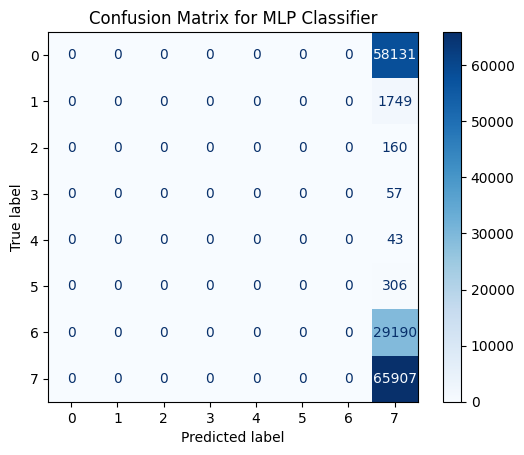

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Menghitung confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for MLP Classifier")
plt.show()


### Confusion Matrix for KNN Classifier

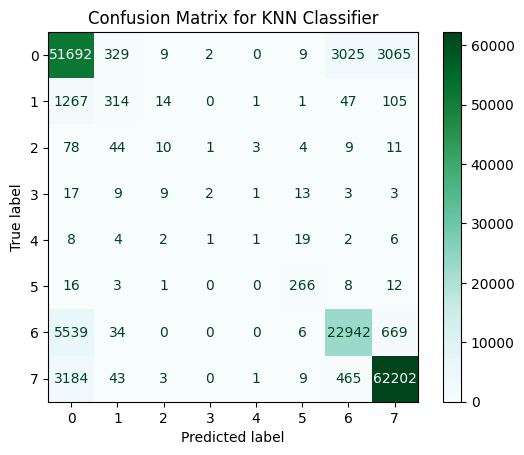

In [28]:
# Menghitung confusion matrix
cm_knn = confusion_matrix(Y_test, Y_pred_knn)

# Menampilkan confusion matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(cmap=plt.cm.BuGn)
plt.title("Confusion Matrix for KNN Classifier")
plt.show()


### Confusion Matrix for Naive Bayes Classifier

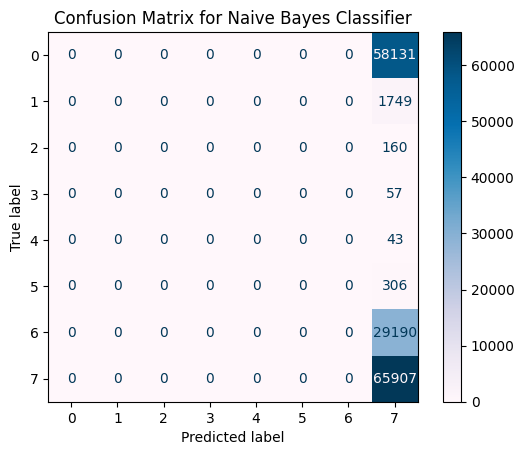

In [29]:
# Menghitung confusion matrix
cm_nb = confusion_matrix(Y_test, Y_pred_nb)

# Menampilkan confusion matrix
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot(cmap=plt.cm.PuBu)
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()

### Confusion Matrix for Random Forest Classifier

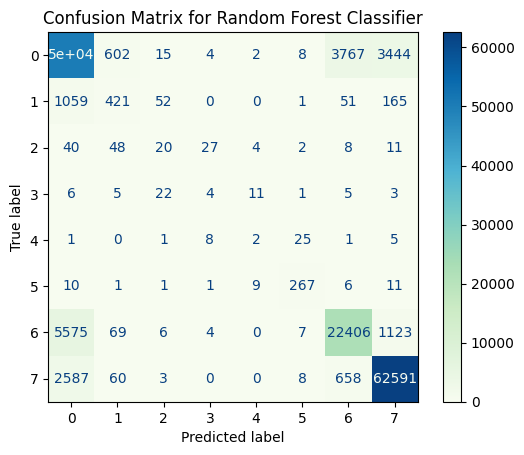

In [30]:
# Menghitung confusion matrix
cm_rf = confusion_matrix(Y_test, Y_pred_rf)

# Menampilkan confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap=plt.cm.GnBu)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

## Melihat distribusi data test dan train

langkah ini di lakukan untuk mencocokan jumlah data pada cinfusion matrix

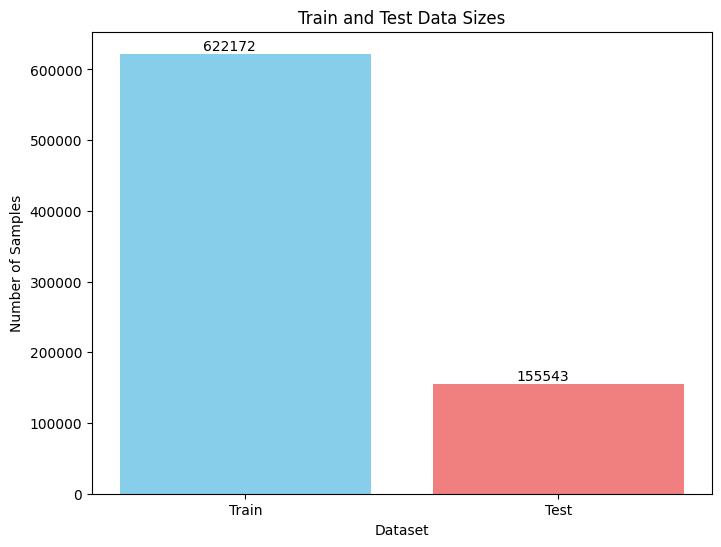

In [31]:

train_size = len(X_train)
test_size = len(X_test)


plt.figure(figsize=(8, 6))
bars = plt.bar(["Train", "Test"], [train_size, test_size], color=['skyblue', 'lightcoral'])


for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.05, bar.get_height() + 100, '%d' % int(bar.get_height()), ha='center', va='bottom', color='black')


plt.title('Train and Test Data Sizes')
plt.ylabel('Number of Samples')
plt.xlabel('Dataset')


plt.show()

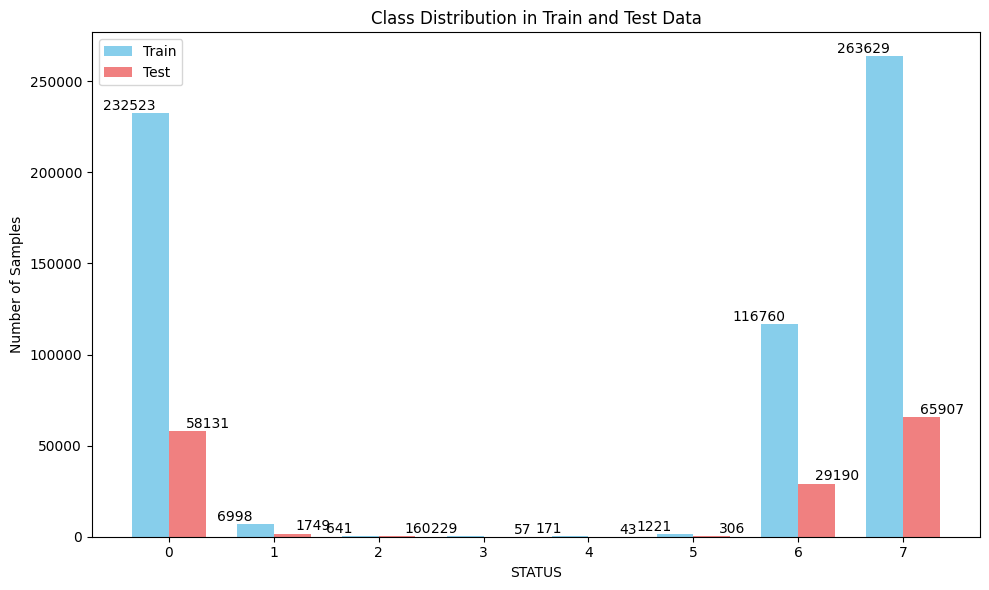

In [32]:
import numpy as np

train_size = len(X_train)
test_size = len(X_test)

unique_classes = np.unique(np.concatenate((Y_train, Y_test), axis=None))


train_class_counts = [np.sum(Y_train == cls) for cls in unique_classes]
test_class_counts = [np.sum(Y_test == cls) for cls in unique_classes]


fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(unique_classes))

train_bars = ax.bar(index - bar_width/2, train_class_counts, bar_width, label='Train', color='skyblue')
test_bars = ax.bar(index + bar_width/2, test_class_counts, bar_width, label='Test', color='lightcoral')


for bar in train_bars:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.2, bar.get_height() + 20, '%d' % int(bar.get_height()), ha='center', va='bottom', color='black')

for bar in test_bars:
    plt.text(bar.get_x() + bar.get_width()/2 + 0.2, bar.get_height() + 20, '%d' % int(bar.get_height()), ha='center', va='bottom', color='black')


ax.set_title('Class Distribution in Train and Test Data')
ax.set_xlabel('STATUS')
ax.set_ylabel('Number of Samples')
ax.set_xticks(index)
ax.set_xticklabels(unique_classes)
ax.legend()


plt.tight_layout()
plt.show()